In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('Onion.csv')

In [4]:
features = ['AvgTemp', 'AvgHumidity', 'Annual_Rainfall','Fertilizer','Pesticide']

# Extract features and target variable
X = df[features]
y = df['Yield']

In [86]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Assuming 'df' is your DataFrame with the provided data
# Columns: State, Year, Avg Temp, Avg Humidity, Total Rainfall, Crop, Season, Area, Production, Annual_Rainfall, Fertilizer, Pesticide, Yield
df = pd.read_csv('Onion.csv')
# Select relevant features for training
features = ['AvgTemp', 'AvgHumidity', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']

# Extract features and target variable
X = df[features]
y = df['Yield']

# Normalize numerical features
scaler = StandardScaler()
X[features] = scaler.fit_transform(X[features])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

# Build the model function
def build_model(hidden_layer_sizes=(200, 100, 50), learning_rate=0.001, activation=('relu', 'relu', 'relu')):
    model = Sequential()
    model.add(Dense(hidden_layer_sizes[0], activation=activation[0], input_dim=len(features)))
    model.add(Dense(hidden_layer_sizes[1], activation=activation[1]))
    model.add(Dense(hidden_layer_sizes[2], activation=activation[2]))
    model.add(Dense(1))

    model.compile(optimizer=Adam(lr=learning_rate), loss='mean_squared_error')
    return model

# Wrap Keras model using KerasRegressor
keras_model = KerasRegressor(build_fn=build_model, epochs=200, batch_size=16, verbose=0)
activation_combinations = [
    ('relu', 'relu', 'relu'),
    ('relu', 'relu', 'tanh'),
    ('relu', 'relu', 'sigmoid'),
    ('relu', 'tanh', 'relu'),
    ('relu', 'tanh', 'tanh'),
    ('relu', 'tanh', 'sigmoid'),
    ('relu', 'sigmoid', 'relu'),
    ('relu', 'sigmoid', 'tanh'),
    ('relu', 'sigmoid', 'sigmoid'),
    ('tanh', 'relu', 'relu'),
    ('tanh', 'relu', 'tanh'),
    ('tanh', 'relu', 'sigmoid'),
    ('tanh', 'tanh', 'relu'),
    ('tanh', 'tanh', 'tanh'),
    ('tanh', 'tanh', 'sigmoid'),
    ('tanh', 'sigmoid', 'relu'),
    ('tanh', 'sigmoid', 'tanh'),
    ('tanh', 'sigmoid', 'sigmoid'),
    ('sigmoid', 'relu', 'relu'),
    ('sigmoid', 'relu', 'tanh'),
    ('sigmoid', 'relu', 'sigmoid'),
    ('sigmoid', 'tanh', 'relu'),
    ('sigmoid', 'tanh', 'tanh'),
    ('sigmoid', 'tanh', 'sigmoid'),
    ('sigmoid', 'sigmoid', 'relu'),
    ('sigmoid', 'sigmoid', 'tanh'),
    ('sigmoid', 'sigmoid', 'sigmoid')
]

# Define hyperparameters for grid search
param_grid = {
    'hidden_layer_sizes': [(200, 100, 50), (100, 50, 25), (150, 75, 30)],
    'learning_rate': [0.001, 0.01, 0.1],
    'activation': activation_combinations
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=keras_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)


# Calculate RMSE
rmse = np.sqrt(np.mean((y_true - y_pred)**2))

print("Root Mean Squared Error:", rmse)

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


C:\Users\ishan\AppData\Local\Temp\ipykernel_3312\4136503804.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[features] = scaler.fit_transform(X[features])
C:\Users\ishan\AppData\Local\Temp\ipykernel_3312\4136503804.py:39: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_model = KerasRegressor(build_fn=build_model, epochs=200, batch_size=16, verbose=0)
C:\Users\ishan\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\ishan\AppData\Roaming\

C:\Users\ishan\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\ishan\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\ishan\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\ishan\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\ishan\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprec

C:\Users\ishan\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\ishan\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\ishan\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\ishan\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\ishan\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprec

Mean Squared Error on Test Data: 75.79
Prediction: 12.63, Actual: 8.55
Prediction: 11.62, Actual: 14.46
Prediction: 24.48, Actual: 8.50
Prediction: 9.38, Actual: 5.00
Prediction: 9.70, Actual: 2.79
Prediction: 3.30, Actual: 8.01
Prediction: 24.48, Actual: 14.75
Prediction: 24.48, Actual: 8.03
Prediction: 3.94, Actual: 2.21
Prediction: 8.19, Actual: 5.13
Best Hyperparameters: {'activation': ('sigmoid', 'sigmoid', 'sigmoid'), 'hidden_layer_sizes': (200, 100, 50), 'learning_rate': 0.001}


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Assuming 'df' is your DataFrame with the provided data
# Columns: State, Year, Avg Temp, Avg Humidity, Total Rainfall, Crop, Season, Area, Production, Annual_Rainfall, Fertilizer, Pesticide, Yield
df = pd.read_csv('Potato.csv')
# Select relevant features for training
features = ['AvgTemp', 'AvgHumidity', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']

# Extract features and target variable
X = df[features]
y = df['Yield']

# Normalize numerical features
scaler = StandardScaler()
X[features] = scaler.fit_transform(X[features])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

# Build the model function
def build_model(hidden_layer_sizes=(200, 100, 50), learning_rate=0.001, activation=('relu', 'relu', 'relu')):
    model = Sequential()
    model.add(Dense(hidden_layer_sizes[0], activation=activation[0], input_dim=len(features)))
    model.add(Dense(hidden_layer_sizes[1], activation=activation[1]))
    model.add(Dense(hidden_layer_sizes[2], activation=activation[2]))
    model.add(Dense(1))

    model.compile(optimizer=Adam(lr=learning_rate), loss='mean_squared_error')
    return model

# Wrap Keras model using KerasRegressor
keras_model = KerasRegressor(build_fn=build_model, epochs=200, batch_size=16, verbose=0)
activation_combinations = [
    ('relu', 'relu', 'relu'),
    ('relu', 'relu', 'tanh'),
    ('relu', 'relu', 'sigmoid'),
    ('relu', 'tanh', 'relu'),
    ('relu', 'tanh', 'tanh'),
    ('relu', 'tanh', 'sigmoid'),
    ('relu', 'sigmoid', 'relu'),
    ('relu', 'sigmoid', 'tanh'),
    ('relu', 'sigmoid', 'sigmoid'),
    ('tanh', 'relu', 'relu'),
    ('tanh', 'relu', 'tanh'),
    ('tanh', 'relu', 'sigmoid'),
    ('tanh', 'tanh', 'relu'),
    ('tanh', 'tanh', 'tanh'),
    ('tanh', 'tanh', 'sigmoid'),
    ('tanh', 'sigmoid', 'relu'),
    ('tanh', 'sigmoid', 'tanh'),
    ('tanh', 'sigmoid', 'sigmoid'),
    ('sigmoid', 'relu', 'relu'),
    ('sigmoid', 'relu', 'tanh'),
    ('sigmoid', 'relu', 'sigmoid'),
    ('sigmoid', 'tanh', 'relu'),
    ('sigmoid', 'tanh', 'tanh'),
    ('sigmoid', 'tanh', 'sigmoid'),
    ('sigmoid', 'sigmoid', 'relu'),
    ('sigmoid', 'sigmoid', 'tanh'),
    ('sigmoid', 'sigmoid', 'sigmoid')
]

# Define hyperparameters for grid search
param_grid = {
    'hidden_layer_sizes': [(200, 100, 50), (100, 50, 25), (150, 75, 30)],
    'learning_rate': [0.001, 0.01, 0.1],
    'activation': activation_combinations
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=keras_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)


# Calculate RMSE
rmse = np.sqrt(np.mean((y_true - y_pred)**2))

print("Root Mean Squared Error:", rmse)

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


C:\Users\ishan\AppData\Local\Temp\ipykernel_3312\1483187854.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[features] = scaler.fit_transform(X[features])
C:\Users\ishan\AppData\Local\Temp\ipykernel_3312\1483187854.py:39: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_model = KerasRegressor(build_fn=build_model, epochs=200, batch_size=16, verbose=0)
C:\Users\ishan\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\ishan\AppData\Roaming\

C:\Users\ishan\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\ishan\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\ishan\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\ishan\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\ishan\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprec

C:\Users\ishan\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\ishan\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\ishan\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\ishan\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\ishan\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprec

C:\Users\ishan\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\ishan\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\ishan\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\ishan\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\ishan\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprec

C:\Users\ishan\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\ishan\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\ishan\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\ishan\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\ishan\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprec

In [83]:
columns_to_drop = ['Pesticide', 'Fertilizer']
df_without_columns = X.drop(columns=columns_to_drop,axis=1)
X = df_without_columns

In [6]:


df1 = pd.DataFrame(data)

matrix_data = X.values

print(matrix_data.shape)


(278, 5)


In [8]:
matrix_data1 = y.values
print(matrix_data1)

[1.53088889e+01 1.84063158e+01 1.58561111e+01 2.50905263e+01
 1.77862500e+01 1.82145000e+01 1.34182353e+01 2.45289474e+01
 1.53528571e+01 2.53437500e+01 1.84018182e+01 1.96354545e+01
 1.78454545e+01 1.91209091e+01 1.66590909e+01 1.49958333e+01
 2.10541667e+01 2.21100000e+01 3.81420000e+02 4.46200000e+01
 2.47572727e+02 8.02680000e+01 2.22244444e+01 2.17675000e+01
 1.01544000e+01 9.87040000e+00 1.11670370e+01 1.13196154e+01
 8.30461538e+00 8.11407407e+00 8.55111111e+00 9.52416667e+00
 6.71107143e+00 1.02769231e+01 5.26740741e+00 9.71416667e+00
 9.68407407e+00 8.91269231e+00 5.87851852e+00 9.08814815e+00
 7.23740741e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.66050000e+01 2.66927778e+01 2.60365000e+01 2.46695652e+01
 2.69650000e+01 2.33210000e+01 2.20940000e+01 3.07339130e+01
 2.79612500e+01 2.81872414e+01 2.65060000e+01 2.69415385e+01
 2.61790000e+01 2.63870370e+01 2.65553333e+01 2.87637931e+01
 2.51940000e+01 2.770520

In [9]:
b = matrix_data1.reshape(-1,1)
b.shape

(278, 1)

In [10]:
a = matrix_data
a.shape

(278, 5)

In [121]:
a.shape
testingvalues = a[5:0]

In [55]:
tens = torch.tensor([[0.02, 0.1, 0.15],
                            [0.7, 0.6, 0.8],
                            [1.5, 1.2, 1.7],
                            [3.2, 2.9, 3.1]])
tens.dtype

torch.float32

In [76]:
data_outputs = torch.tensor([[0.1],
                             [0.6],
                             [1.3],
                             [2.5]])

In [75]:
import torch

# Existing tensor
existing_tensor = torch.tensor([[0.02, 0.1, 0.15],
                                [0.7, 0.6, 0.8],
                                [1.5, 1.2, 1.7],
                                [3.2, 2.9, 3.1]])

# New column data
new_column_data = torch.tensor([[0.5],
                                [1.0],
                                [2.0],
                                [4.0]])

# Add the new column
new_tensor = torch.cat((existing_tensor, new_column_data), dim=1)

print(new_tensor)


tensor([[0.0200, 0.1000, 0.1500, 0.5000],
        [0.7000, 0.6000, 0.8000, 1.0000],
        [1.5000, 1.2000, 1.7000, 2.0000],
        [3.2000, 2.9000, 3.1000, 4.0000]])


In [32]:
dat.shape

torch.Size([4, 3])

In [36]:
data_outputs.shape

torch.Size([4, 1])

In [3]:
df = pd.read_csv('Onion.csv')

In [8]:
features = ['AvgTemp', 'AvgHumidity', 'Annual_Rainfall','Fertilizer','Pesticide']

# Extract features and target variable
X = df[features]
y = df['Yield']

In [90]:
data_inputs = torch.tensor(a)

# Data outputs
data_outputs = torch.tensor(b)

In [91]:
data_outputs.dtype == data_inputs.dtype

True

In [11]:
import numpy as np
a = a.astype(np.float32)
b = b.astype(np.float32)

In [12]:
a.shape
b.shape

(278, 1)

In [181]:
newa = a[:,:2]
newa.shape

(278, 2)

In [171]:
newa

array([[2.7200001e+01, 6.7000000e+01, 9.4459998e+02, 3.8224580e+06,
        2.4050701e+03],
       [2.7200001e+01, 6.7000000e+01, 9.4459998e+02, 1.9649405e+06,
        1.2363300e+03],
       [2.6500000e+01, 6.4000000e+01, 7.1100000e+02, 3.5766922e+06,
        3.9021799e+03],
       [2.6500000e+01, 6.4000000e+01, 7.1100000e+02, 2.1203985e+06,
        2.3133601e+03],
       [2.7799999e+01, 6.9000000e+01, 1.2970000e+03, 4.2544095e+06,
        6.1468799e+03]], dtype=float32)

In [172]:
newb

array([[15.308888],
       [18.406315],
       [15.856112],
       [25.090527],
       [17.78625 ]], dtype=float32)

In [175]:
rounded_input = torch.tensor([[27.2, 67, 944.6, 3822457.92, 2405.07],
                              [27.2, 67, 944.6, 1964940.48, 1236.33],
                              [26.5, 64, 711.0, 3576692.28, 3902.18],
                              [26.5, 64, 711.0, 2120398.56, 2313.36],
                              [27.8, 69, 1297.0, 4254409.32, 6146.88]])

rounded_output = torch.tensor([[15.31],
                               [18.41],
                               [15.86],
                               [25.09],
                               [17.79]])

rounded_input_first_two_columns = torch.tensor([[27.2, 67],
                                                [27.2, 67],
                                                [26.5, 64],
                                                [26.5, 64],
                                                [27.8, 69]])

Sequential(
  (0): Linear(in_features=5, out_features=2, bias=True)
  (1): ReLU()
  (2): Linear(in_features=2, out_features=1, bias=True)
)
Generation = 1
Fitness    = -3.8171720505760742
Generation = 2
Fitness    = -3.8171720505760742
Generation = 3
Fitness    = -3.8171720505760742
Generation = 4
Fitness    = -3.8171720505760742
Generation = 5
Fitness    = -3.776333808998926
Generation = 6
Fitness    = -3.776333808998926
Generation = 7
Fitness    = -3.776333808998926
Generation = 8
Fitness    = -3.776333808998926
Generation = 9
Fitness    = -3.776333808998926
Generation = 10
Fitness    = -3.776333808998926
Generation = 11
Fitness    = -3.776333808998926
Generation = 12
Fitness    = -3.776333808998926
Generation = 13
Fitness    = -3.744821310143335
Generation = 14
Fitness    = -3.744821310143335
Generation = 15
Fitness    = -3.744821310143335
Generation = 16
Fitness    = -3.744821310143335
Generation = 17
Fitness    = -3.744821310143335
Generation = 18
Fitness    = -3.744821310143335
G

Fitness    = -3.1385977269218994
Generation = 178
Fitness    = -3.1385977269218994
Generation = 179
Fitness    = -3.1385977269218994
Generation = 180
Fitness    = -3.1385977269218994
Generation = 181
Fitness    = -3.1385977269218994
Generation = 182
Fitness    = -3.1385977269218994
Generation = 183
Fitness    = -3.1385977269218994
Generation = 184
Fitness    = -3.1385977269218994
Generation = 185
Fitness    = -3.1385977269218994
Generation = 186
Fitness    = -3.1385977269218994
Generation = 187
Fitness    = -3.1385977269218994
Generation = 188
Fitness    = -3.1385977269218994
Generation = 189
Fitness    = -3.1385977269218994
Generation = 190
Fitness    = -3.1385977269218994
Generation = 191
Fitness    = -3.1385977269218994
Generation = 192
Fitness    = -3.1385977269218994
Generation = 193
Fitness    = -3.1385977269218994
Generation = 194
Fitness    = -3.1385977269218994
Generation = 195
Fitness    = -3.1385977269218994
Generation = 196
Fitness    = -3.1385977269218994
Generation = 197


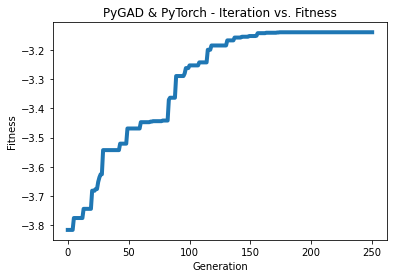

Fitness value of the best solution = -3.138479709725244
Index of the best solution : 0
Predictions : n [[9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.690201]
 [9.69020

In [36]:
import torch
import pygad
import pygad.torchga as torchga


def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, torch_ga, model, loss_function

    model_weights_dict = torchga.model_weights_as_dict(model=model,
                                                       weights_vector=solution)

    # Use the current solution as the model parameters.
    model.load_state_dict(model_weights_dict)

    predictions = model(data_inputs)
    mse = loss_function(predictions, data_outputs)
    rmse = torch.sqrt(mse).detach().numpy() + 1e-10  # Adding a small value to avoid division by zero

    # Use RMSE as the fitness directly (minimize RMSE)
    solution_fitness = -rmse

    return solution_fitness


def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

# Create the PyTorch model.
input_layer = torch.nn.Linear(5, 2)
relu_layer = torch.nn.ReLU()
output_layer = torch.nn.Linear(2, 1)

model = torch.nn.Sequential(input_layer,
                            relu_layer,
                            output_layer)
print(model)
weights = model.state_dict()

# Create an instance of the pygad.torchga.TorchGA class to build the initial population.
torch_ga = pygad.torchga.TorchGA(model=model,
                                num_solutions=8)

loss_function = torch.nn.L1Loss()

# Data inputs
data_inputs = torch.tensor(a)

# Data outputs
data_outputs = torch.tensor(b)
# Prepare the PyGAD parameters. Check the documentation for more information: https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#pygad-ga-class
num_generations = 250 # Number of generations.
num_parents_mating = 5 # Number of solutions to be selected as parents in the mating pool.
initial_population = torch_ga.population_weights # Initial population of network weights
parent_selection_type = "sss" # Type of parent selection.
crossover_type = "single_point" # Type of the crossover operator.
mutation_type = "random" # Type of theutation operator.
mutation_percent_genes = 20 # Percentage of genes to mutate. This parameter has no action if the parameter mutation_num_genes exists.
keep_parents = -1 # Number of parents to keep in the next population. -1 means keep all parents and 0 means keep nothing.

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       parent_selection_type=parent_selection_type,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       keep_parents=keep_parents,
                       on_generation=callback_generation)

ga_instance.run()

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_result(title="PyGAD & PyTorch - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Fetch the parameters of the best solution.
best_solution_weights = torchga.model_weights_as_dict(model=model,
                                                      weights_vector=solution)
model.load_state_dict(best_solution_weights)
predictions = model(data_inputs)
print("Predictions : n", predictions.detach().numpy())

abs_error = loss_function(predictions, data_outputs)
print("rmse : ", abs_error.detach().numpy())

In [38]:
weights

OrderedDict([('0.weight',
              tensor([[-0.5427, -3.1640, -3.1179, -1.3226, -1.5888],
                      [-1.3795,  2.4841, -4.4485, -3.0042,  0.8054]])),
             ('0.bias', tensor([ 3.2967, -1.3168])),
             ('2.weight', tensor([[ 0.2494, -2.6753]])),
             ('2.bias', tensor([9.6902]))])

In [17]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0286,  1.2038, -0.0541, -0.1058, -0.5733],
                      [-1.9636,  2.7938, -1.3331, -0.0527,  1.4355]])),
             ('0.bias', tensor([ 0.3224, -1.3254])),
             ('2.weight', tensor([[0.5459, 0.9219]])),
             ('2.bias', tensor([9.5640]))])

In [20]:
np.array_equal(best_solution_weights,weights)

False

In [25]:
np.array(weights)

array(OrderedDict([('0.weight', tensor([[-0.0286,  1.2038, -0.0541, -0.1058, -0.5733],
        [-1.9636,  2.7938, -1.3331, -0.0527,  1.4355]])), ('0.bias', tensor([ 0.3224, -1.3254])), ('2.weight', tensor([[0.5459, 0.9219]])), ('2.bias', tensor([9.5640]))]),
      dtype=object)

In [185]:
y

0      15.308889
1      18.406316
2      15.856111
3      25.090526
4      17.786250
         ...    
273     2.400000
274     0.500000
275     1.992500
276     0.335000
277     2.426667
Name: Yield, Length: 278, dtype: float64

[array([[ 0.31620538, -0.29258573,  0.20236933, -0.31960332,  0.0130693 ,
         -0.31227386, -0.37106612, -0.05511627,  0.18388897, -0.37293535,
         -0.37991986, -0.18592969,  0.05207247, -0.31794697,  0.1247707 ,
          0.33410126,  0.28934014,  0.04623881,  0.3704105 , -0.00588068,
          0.08182499, -0.01254711,  0.3274693 , -0.2193876 ,  0.12116849,
          0.22033137,  0.30973947,  0.04411104,  0.24510342,  0.01483589,
          0.18622607,  0.03599516],
        [-0.38121703,  0.39423037,  0.05928481,  0.16629821, -0.2549731 ,
         -0.11640498, -0.3627325 , -0.31724486, -0.1255494 ,  0.04783872,
          0.02364495, -0.35826114,  0.3213637 ,  0.31709337,  0.01663837,
          0.11481696,  0.06943101, -0.3092922 ,  0.24337995, -0.04715112,
         -0.17543669, -0.29290035,  0.2598192 ,  0.04896906, -0.35847446,
         -0.07153323, -0.08269483,  0.3298669 ,  0.20276076, -0.15930957,
         -0.01962811, -0.05599666],
        [-0.30972835,  0.29775828, -0.19

In [56]:
def mat_to_vector(mat_pop_weights):
    pop_weights_vector = []
    for sol_idx in range(len(mat_pop_weights)):
        for layer_weights in mat_pop_weights[sol_idx]:
            pop_weights_vector.extend(layer_weights.flatten())
    return np.array(pop_weights_vector)

def vector_to_mat(vector_pop_weights, mat_pop_weights):
    mat_weights = []
    start = 0
    for layer_weights in mat_pop_weights:
        end = start + layer_weights.size
        mat_layer_weights = np.reshape(vector_pop_weights[start:end], layer_weights.shape)
        mat_weights.append(mat_layer_weights)
        start = end
    return mat_weights


In [60]:
len(mat_to_vector(a))

225

Generation = 1
Fitness    = 0.23747516853911924
Generation = 2
Fitness    = 0.23747516853911924
Generation = 3
Fitness    = 0.237541607822672
Generation = 4
Fitness    = 0.26817443859362483
Generation = 5
Fitness    = 0.26817443859362483
Generation = 6
Fitness    = 0.26817443859362483
Generation = 7
Fitness    = 0.26817443859362483
Generation = 8
Fitness    = 0.26817443859362483
Generation = 9
Fitness    = 0.26817443859362483
Generation = 10
Fitness    = 0.26817443859362483
Generation = 11
Fitness    = 0.26817443859362483
Generation = 12
Fitness    = 0.26817443859362483
Generation = 13
Fitness    = 0.26817443859362483
Generation = 14
Fitness    = 0.2719023016985308
Generation = 15
Fitness    = 0.2753515647773086
Generation = 16
Fitness    = 0.27642426770402784
Generation = 17
Fitness    = 0.27642426770402784
Generation = 18
Fitness    = 0.27642426770402784
Generation = 19
Fitness    = 0.27642426770402784
Generation = 20
Fitness    = 0.2780945657128391
Generation = 21
Fitness    = 0.278

Generation = 173
Fitness    = 0.31861345583690087
Generation = 174
Fitness    = 0.31861345583690087
Generation = 175
Fitness    = 0.31861345583690087
Generation = 176
Fitness    = 0.31861345583690087
Generation = 177
Fitness    = 0.31861345583690087
Generation = 178
Fitness    = 0.31861345583690087
Generation = 179
Fitness    = 0.31861345583690087
Generation = 180
Fitness    = 0.31861345583690087
Generation = 181
Fitness    = 0.31861345583690087
Generation = 182
Fitness    = 0.31861345583690087
Generation = 183
Fitness    = 0.31861345583690087
Generation = 184
Fitness    = 0.31861345583690087
Generation = 185
Fitness    = 0.31861345583690087
Generation = 186
Fitness    = 0.31861345583690087
Generation = 187
Fitness    = 0.31861345583690087
Generation = 188
Fitness    = 0.31861345583690087
Generation = 189
Fitness    = 0.31861345583690087
Generation = 190
Fitness    = 0.31861345583690087
Generation = 191
Fitness    = 0.31861345583690087
Generation = 192
Fitness    = 0.31861345583690087


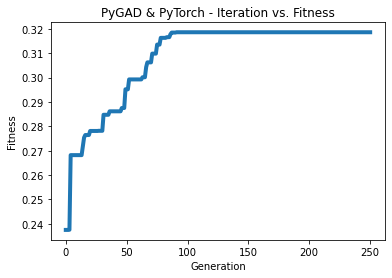

Fitness value of the best solution = 0.31861345583690087
Index of the best solution : 0
Predictions : n [[9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.754395]
 [9.7543

In [110]:
import torch
import pygad
import pygad.torchga as torchga


def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, torch_ga, model, loss_function

    model_weights_dict = torchga.model_weights_as_dict(model=model, weights_vector=solution)

    # Use the current solution as the model parameters.
    model.load_state_dict(model_weights_dict)

    predictions = model(data_inputs)
    
    # Calculate the RMSE
    mse = loss_function(predictions, data_outputs)
    rmse = torch.sqrt(mse).detach().numpy() + 1e-10  # Adding a small value to avoid division by zero

    # Use the inverse of RMSE as the fitness
    solution_fitness = 1.0 / rmse

    return solution_fitness

def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

# Create the PyTorch model.
input_layer = torch.nn.Linear(5, 2)
relu_layer = torch.nn.ReLU()
output_layer = torch.nn.Linear(2, 1)

model = torch.nn.Sequential(input_layer,
                            relu_layer,
                            output_layer)
# print(model)

# Create an instance of the pygad.torchga.TorchGA class to build the initial population.
torch_ga = pygad.torchga.TorchGA(model=model,
                                num_solutions=10)

loss_function = torch.nn.L1Loss()

# Data inputs
data_inputs = torch.tensor(a)

# Data outputs
data_outputs = torch.tensor(b)
# Prepare the PyGAD parameters. Check the documentation for more information: https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#pygad-ga-class
num_generations = 250 # Number of generations.
num_parents_mating = 5 # Number of solutions to be selected as parents in the mating pool.
initial_population = torch_ga.population_weights # Initial population of network weights
parent_selection_type = "sss" # Type of parent selection.
crossover_type = "single_point" # Type of the crossover operator.
mutation_type = "random" # Type of the mutation operator.
mutation_percent_genes = 10 # Percentage of genes to mutate. This parameter has no action if the parameter mutation_num_genes exists.
keep_parents = -1 # Number of parents to keep in the next population. -1 means keep all parents and 0 means keep nothing.

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       parent_selection_type=parent_selection_type,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       keep_parents=keep_parents,
                       on_generation=callback_generation)

ga_instance.run()

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_result(title="PyGAD & PyTorch - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Fetch the parameters of the best solution.
best_solution_weights = torchga.model_weights_as_dict(model=model,
                                                      weights_vector=solution)
model.load_state_dict(best_solution_weights)
predictions = model(data_inputs)
print("Predictions : n", predictions.detach().numpy())

abs_error = loss_function(predictions, data_outputs)
print("Rmse : ", abs_error.detach().numpy())

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

In [127]:
b = model(torch.tensor(testingvalues))

In [131]:
testingvalues

array([], shape=(0, 5), dtype=float32)

In [138]:
tval = a[0:100]

In [139]:
tval

array([[2.7200001e+01, 6.7000000e+01, 9.4459998e+02, 3.8224580e+06,
        2.4050701e+03],
       [2.7200001e+01, 6.7000000e+01, 9.4459998e+02, 1.9649405e+06,
        1.2363300e+03],
       [2.6500000e+01, 6.4000000e+01, 7.1100000e+02, 3.5766922e+06,
        3.9021799e+03],
       [2.6500000e+01, 6.4000000e+01, 7.1100000e+02, 2.1203985e+06,
        2.3133601e+03],
       [2.7799999e+01, 6.9000000e+01, 1.2970000e+03, 4.2544095e+06,
        6.1468799e+03],
       [2.7799999e+01, 6.9000000e+01, 1.2970000e+03, 2.9545985e+06,
        4.2688799e+03],
       [2.6900000e+01, 6.6000000e+01, 8.6190002e+02, 6.6359700e+06,
        1.3072290e+04],
       [2.6900000e+01, 6.6000000e+01, 8.6190002e+02, 2.9111625e+06,
        5.7347402e+03],
       [2.7500000e+01, 6.8000000e+01, 9.6870001e+02, 3.7700000e+06,
        7.7500000e+03],
       [2.7500000e+01, 6.8000000e+01, 9.6870001e+02, 2.1112000e+06,
        4.3400000e+03],
       [2.7000000e+01, 6.5000000e+01, 1.0623000e+03, 3.0283660e+06,
        5.65

In [141]:
y[0:5]

0    15.308889
1    18.406316
2    15.856111
3    25.090526
4    17.786250
Name: Yield, dtype: float64

Sequential(
  (0): Linear(in_features=5, out_features=2, bias=True)
  (1): ReLU()
  (2): Linear(in_features=2, out_features=1, bias=True)
)
Generation = 1
Fitness    = -3.8705549241112305
Generation = 2
Fitness    = -3.740781784157617
Generation = 3
Fitness    = -3.644047498803003
Generation = 4
Fitness    = -3.644047498803003
Generation = 5
Fitness    = -3.585162878136499
Generation = 6
Fitness    = -3.5695254803703858
Generation = 7
Fitness    = -3.5282092095421387
Generation = 8
Fitness    = -3.4420881272362305
Generation = 9
Fitness    = -3.381798029045923
Generation = 10
Fitness    = -3.3467299939201904
Generation = 11
Fitness    = -3.3467299939201904
Generation = 12
Fitness    = -3.3032686711357666
Generation = 13
Fitness    = -3.2690885067986084
Generation = 14
Fitness    = -3.245617389778955
Generation = 15
Fitness    = -3.2345151902245117
Generation = 16
Fitness    = -3.187817335228784
Generation = 17
Fitness    = -3.166836738686426
Generation = 18
Fitness    = -3.147132158379

Fitness    = -3.138472557167871
Generation = 173
Fitness    = -3.138472557167871
Generation = 174
Fitness    = -3.138472557167871
Generation = 175
Fitness    = -3.138472557167871
Generation = 176
Fitness    = -3.138472557167871
Generation = 177
Fitness    = -3.138472557167871
Generation = 178
Fitness    = -3.138472557167871
Generation = 179
Fitness    = -3.138472557167871
Generation = 180
Fitness    = -3.138472557167871
Generation = 181
Fitness    = -3.138472557167871
Generation = 182
Fitness    = -3.138472557167871
Generation = 183
Fitness    = -3.138472557167871
Generation = 184
Fitness    = -3.138472557167871
Generation = 185
Fitness    = -3.138472557167871
Generation = 186
Fitness    = -3.138472557167871
Generation = 187
Fitness    = -3.138472557167871
Generation = 188
Fitness    = -3.138472557167871
Generation = 189
Fitness    = -3.138472557167871
Generation = 190
Fitness    = -3.138472557167871
Generation = 191
Fitness    = -3.138472557167871
Generation = 192
Fitness    = -3.1384

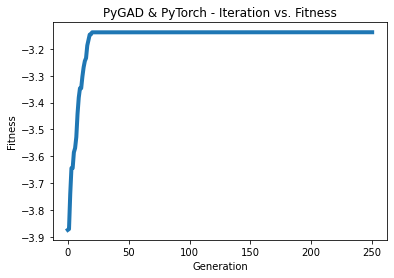

Fitness value of the best solution = -3.138472557167871
Index of the best solution : 0
Predictions : n [[9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.680811]
 [9.68081

In [37]:
import torch
import pygad
import pygad.torchga as torchga

def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, model, loss_function

    model_weights_dict = torchga.model_weights_as_dict(model=model, weights_vector=solution)
    model.load_state_dict(model_weights_dict)

    predictions = model(data_inputs)
    mse = loss_function(predictions, data_outputs)
    rmse = torch.sqrt(mse).detach().numpy() + 1e-10  # Adding a small value to avoid division by zero

    # Use RMSE as the fitness directly (minimize RMSE)
    solution_fitness = -rmse

    return solution_fitness

def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

# Create the PyTorch model.
input_layer = torch.nn.Linear(5, 2)
relu_layer = torch.nn.ReLU()
output_layer = torch.nn.Linear(2, 1)

model = torch.nn.Sequential(input_layer, relu_layer, output_layer)
print(model)

# Create an instance of the pygad.torchga.TorchGA class to build the initial population.
torch_ga = pygad.torchga.TorchGA(model=model, num_solutions=20)

loss_function = torch.nn.L1Loss()

# Data inputs
data_inputs = torch.tensor(a)

# Data outputs
data_outputs = torch.tensor(b)

# Prepare the PyGAD parameters.
num_generations = 250
num_parents_mating = 5
initial_population = torch_ga.population_weights
parent_selection_type = "sss"
crossover_type = "single_point"
mutation_type = "random"
mutation_percent_genes = 50
keep_parents = -1

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       parent_selection_type=parent_selection_type,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       keep_parents=keep_parents,
                       on_generation=callback_generation)

ga_instance.run()

# After the generations complete, some plots are shown that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_result(title="PyGAD & PyTorch - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Fetch the parameters of the best solution.
best_solution_weights = torchga.model_weights_as_dict(model=model, weights_vector=solution)
model.load_state_dict(best_solution_weights)

predictions = model(data_inputs)
print("Predictions : n", predictions.detach().numpy())

abs_error = loss_function(predictions, data_outputs)
print("rmse : ", abs_error.detach().numpy())


In [66]:
population

[]